**Machine leaning project 1**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn import preprocessing
import sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
df1=pd.read_csv("survey.csv")

In [ ]:
import qgrid
qgrid_widget=qgrid.show_grid(df1.head(n=5), show_toolbar=True)
qgrid_widget

In [42]:
df1.shape

(1259, 27)

In [9]:
df1=df1.dropna()

In [10]:
df1.shape

(86, 27)

In [3]:
df1.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [26]:
df1.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [4]:
##deleting columns that has signific
del df1['state']
del df1['comments']
del df1['Timestamp']

In [86]:
df1.isna().sum()
df1.isnull().sum().max() 

264

In [5]:
df1.shape

(1259, 24)

In [6]:
df1=df1[df1['self_employed'].notnull()]

In [87]:
print(df1.shape)
print(df1.describe())
print(df1.info())

(1259, 24)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anon

In [5]:
df1['Gender'].str.lower()
df1['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [6]:
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
transgender = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]


In [7]:
for i,r in df1.iterrows():
    if str.lower(r.Gender) in male:
        df1['Gender'].replace(to_replace=r.Gender, value='male', inplace=True)
    if str.lower(r.Gender )in female:
        df1['Gender'].replace(to_replace=r.Gender, value='female', inplace=True)
    if str.lower(r.Gender )in transgender:
        df1['Gender'].replace(to_replace=r.Gender, value='transgender', inplace=True)

In [8]:
df1['Gender'].unique()

array(['female', 'male', 'transgender', 'A little about you', 'p'],
      dtype=object)

In [24]:
misc=['A little about you', 'p']
df1=df1[~df1['Gender'].isin(misc)]

In [118]:
df1.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,male,France,Yes,Yes,No,NaN,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


In [125]:
df2=df1.groupby(df1['self_employed'])['self_employed'].count()

In [128]:
df2.to_dataframe()
df2.hist(column='self_employed')

AttributeError: 'Series' object has no attribute 'to_dataframe'

In [15]:
#complete missing age with mean
df1['Age'].fillna(df1['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df1['Age'])
s[s<18] = df1['Age'].median()
df1['Age'] = s
s = pd.Series(df1['Age'])
s[s>120] = df1['Age'].median()
df1['Age'] = s

In [50]:
df1[df1['Age']<19]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
43,18.0,male,Netherlands,No,No,No,Often,6-25,No,Yes,...,Don't know,Somewhat difficult,Yes,Maybe,No,Some of them,No,No,No,No
93,18.0,transgender,Russia,No,No,No,NaN,26-100,Yes,Yes,...,Yes,Somewhat easy,No,No,Yes,Yes,Yes,Yes,Don't know,No
118,18.0,male,United States,No,No,Yes,Rarely,1-5,Yes,Yes,...,Yes,Very easy,No,No,Some of them,No,No,No,Don't know,No
282,18.0,male,United States,No,No,Yes,Sometimes,6-25,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,Maybe,Don't know,No
287,18.0,male,United States,No,No,No,Never,26-100,No,Yes,...,Don't know,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No
478,18.0,male,Finland,No,No,No,NaN,500-1000,Yes,No,...,Don't know,Very easy,Yes,No,No,No,No,Maybe,Don't know,No
482,18.0,female,United Kingdom,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No


In [49]:
## Replace the age values less than 18 and more than 72 with the median
df1.loc[df1['Age']>72,'Age']=df1['Age'].median()
df1.loc[df1['Age']<18,'Age']=df1['Age'].median()

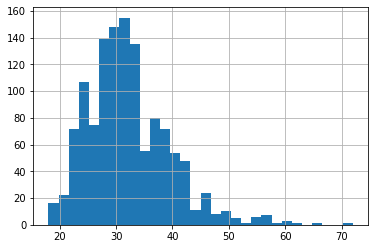

In [57]:
df1['Age'].hist(bins=30)


In [56]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df1.groupby(df1['tech_company'])['tech_company'].count()

tech_company
No      228
Yes    1029
Name: tech_company, dtype: int64

In [20]:
#replacing the nan of self_employed with the value of the NO because most of the people are unemployed
df1['self_employed'].fillna('No',inplace=True)

In [25]:
df1['work_interfere'].groupby(df1['work_interfere']).count()

work_interfere
Never        213
Often        144
Rarely       173
Sometimes    465
Name: work_interfere, dtype: int64

In [32]:
###
df1['work_interfere'].fillna('Dont know', inplace=True)

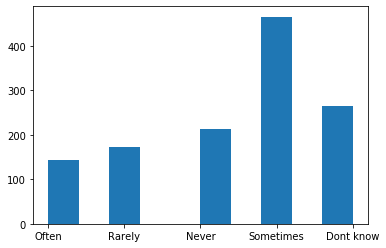

In [49]:
df1['work_interfere'].hist(grid=False)
plt.show()

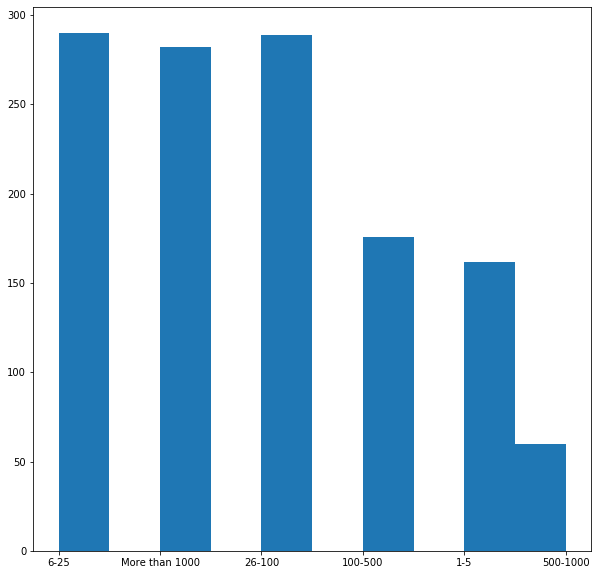

In [45]:
df1['no_employees'].hist(grid=False, figsize=(10,10))

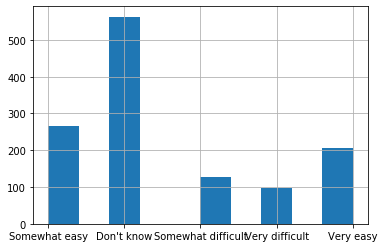

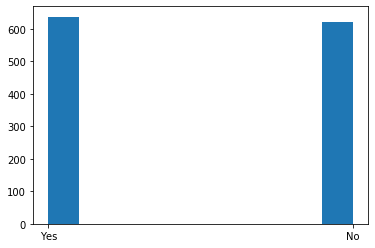

In [53]:
df1['treatment'].hist(grid=False)